In [9]:
pip install cleantext

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install datasets


In [11]:
!pip install datasets

In [ ]:
!pip uninstall pyarrow



In [ ]:
pip install evaluate

In [ ]:
import pandas as pd
import numpy as np
from cleantext import clean
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, TrainingArguments, Trainer, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import evaluate
import random



In [ ]:
#Preprocessing our data

In [ ]:
data_train = pd.read_csv(r"filepath")
data_test = pd.read_csv(r"filepath")
data_val = pd.read_csv(r"filepath")


In [ ]:
print(data_test)

                                                   text    label
0     You must be knowing #blithe means (adj.)  Happ...      joy
1     Old saying 'A #smile shared is one gained for ...      joy
2     Bridget Jones' Baby was bloody hilarious 😅 #Br...      joy
3     @Elaminova sparkling water makes your life spa...      joy
4     I'm tired of everybody telling me to chill out...      joy
...                                                 ...      ...
3137          Why does Candice constantly pout #GBBO 💄😒  sadness
3138  @redBus_in #unhappy with #redbus CC, when I ta...  sadness
3139  @AceOperative789 no pull him afew weeks ago, s...  sadness
3140  I'm buying art supplies and I'm debating how s...  sadness
3141  @sainsburys Could you ask your Chafford Hundre...  sadness

[3142 rows x 2 columns]


In [ ]:
data_train.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
data = pd.concat([data_train,data_test, data_val], ignore_index=True)

In [ ]:
print(data)

                                                   text    label
0     Just got back from seeing @GaryDelaney in Burs...      joy
1     Oh dear an evening of absolute hilarity I don'...      joy
2     Been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : Thank you so much, Gloria! Yo...      joy
4     I feel so blessed to work with the family that...      joy
...                                                 ...      ...
7097  Common app just randomly logged me out as I wa...  sadness
7098  I'd rather laugh with the rarest genius, in be...  sadness
7099  If you #invest in my new #film I will stop ask...  sadness
7100  Just watched Django Unchained, Other people ma...  sadness
7101  @KeithOlbermann depressing how despicable Trum...  sadness

[7102 rows x 2 columns]


In [ ]:
pip install emoji


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade cleantext


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import emoji
from cleantext import clean
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')
data['text_clean']= data['text'].apply(lambda x : clean(remove_emoji(x)))

In [ ]:
data['text_clean']= data['text_clean'].apply(lambda x: re.sub('@[^\s]+', '',x))

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shett\AppData\Local\Temp\ipykernel_4564\793114105.py:1: SyntaxWarning: invalid escape sequence '\s'
  data['text_clean']= data['text_clean'].apply(lambda x: re.sub('@[^\s]+', '',x))


In [ ]:
data.head()  #removes emoji in text

,text,label,text_clean
0,Just got back from seeing @GaryDelaney in Burs...,joy,got back see garydelaney burslem amaz face sti...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear even absolut hilar dont think laugh mu...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,wait week game cheer friday
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,gardinerlov thank much gloria your sweet thoug...
4,I feel so blessed to work with the family that...,joy,feel bless work famili nanni noth love amp app...


In [ ]:
data.head(1) 

,text,label,text_clean
0,Just got back from seeing @GaryDelaney in Burs...,joy,got back see garydelaney burslem amaz face sti...


<Axes: xlabel='label'>

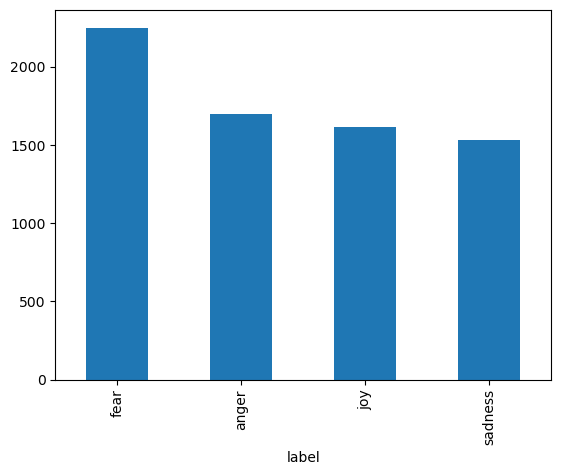

In [ ]:
data['label'].value_counts().plot(kind='bar')

In [ ]:
g = data.groupby('label')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True))

C:\Users\shett\AppData\Local\Temp\ipykernel_4564\577082718.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True))


<Axes: xlabel='label'>

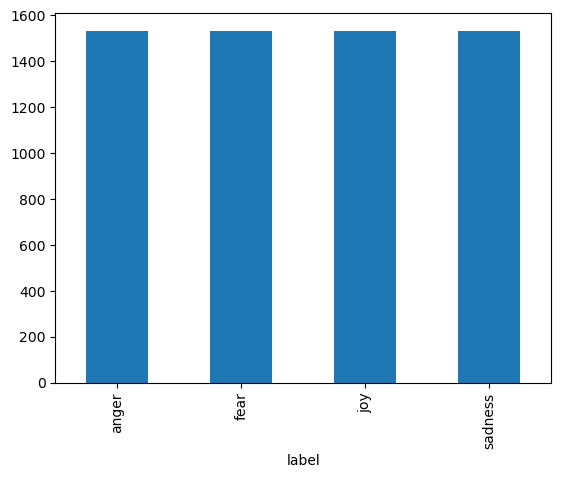

In [ ]:
data['label'].value_counts().plot(kind='bar')

In [ ]:
data['label_int'] = LabelEncoder().fit_transform(data['label'])

In [ ]:
NUM_LABELS= 4

In [ ]:
#creating training and test data

In [ ]:
train_split,test_split = train_test_split(data, train_size=0.8)
train_split, val_split = train_test_split(train_split, train_size=0.9)

In [ ]:
print(len(train_split))
print(len(test_split))
print(len(val_split))

4414
1227
491


In [ ]:
train_df = pd.DataFrame({
    "label": train_split.label_int.values,
    "text": train_split.text_clean.values
})
test_df = pd.DataFrame({
    "label": test_split.label_int.values,
    "text": test_split.text_clean.values
})

In [ ]:
import datasets
train_df = datasets.Dataset.from_dict(train_df)
test_df = datasets.Dataset.from_dict(test_df)

In [ ]:
dataset_dict = datasets.DatasetDict({"train":train_df,"test": test_df})

In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1227
    })
})

In [ ]:
#Embeddings

In [ ]:
pip install sentencepiece


Note: you may need to restart the kernel to use updated packages.


In [ ]:
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

In [ ]:
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length",max_length=128, truncation=True)
                     

In [ ]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/4414 [00:00<?, ? examples/s]

Map:   0%|          | 0/1227 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1227
    })
})

In [ ]:
print(tokenized_datasets['train']['text'][0])

veryelois gunna make cri need glee day


In [ ]:
print(tokenized_datasets['train']['input_ids'][0])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 172, 530, 9106, 2363, 597, 144, 17, 6752, 214, 26774, 191, 4, 3]


In [ ]:
tokenizer.decode(5)

'<pad>'

In [ ]:
print(tokenized_datasets['train']['token_type_ids'][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [ ]:
print(tokenized_datasets['train']['attention_mask'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
small_tain_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(100))
small_test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(100))

In [ ]:
#Fine tuning our modl

In [ ]:
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=NUM_LABELS, id2label = {0:'anger',1:'fear',2:'joy',3:'sadness'})

NameError: name 'NUM_LABELS' is not defined

In [ ]:
metric = evaluate.load('accuracy')

In [ ]:

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
pip install transformers[torch]

   ---------------------------------------- 0.0/333.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/333.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/333.2 kB 435.7 kB/s eta 0:00:01
   ------------------------ --------------- 204.8/333.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  327.7/333.2 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 333.2/333.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install 'accelerate>=0.26.0'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'accelerate"


In [ ]:
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=3)

c:\Users\shett\anaconda3\Lib\site-packages\transformers\training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer= Trainer(
    model= model,
    args= training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics)

NameError: name 'model' is not defined

In [ ]:
trainer.train()